In [2]:
import os
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#loading all necessary libraries
import numpy as np
import pandas as pd
import nltk
import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

from sklearn import metrics

In [3]:
os.chdir(r"C:\Users\D3\Desktop\Machine Learning\Datasets")

In [4]:
data = pd.read_csv('spam.csv', encoding = 'latin1')

data.head()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# drop unnecessary columns and rename cols
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
data.columns = ['label', 'text']

In [7]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# check missing values
print(data.isna().sum())

# check data shape

print(data.shape)


label    0
text     0
dtype: int64
(5572, 2)


<Axes: xlabel='label'>

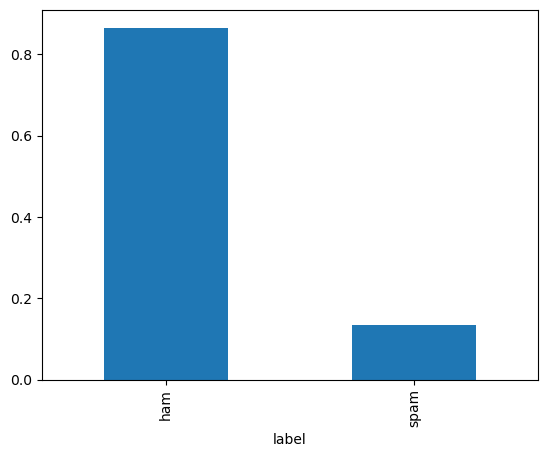

In [9]:
# check target balance

data['label'].value_counts(normalize = True).plot.bar()

In [10]:
# create a list text

text = list(data['text'])

In [11]:
lemmatizer = WordNetLemmatizer()

In [12]:
corpus = []

In [13]:
for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    #r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

In [14]:
#assign corpus to data['text']

data['text'] = corpus
data.head()

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


In [15]:
# Create Feature and Label sets

X = data['text']
y = data['label']

In [16]:
# train test split (66% train - 33% test)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [17]:
print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (3733,)
Testing Data :  (1839,)


In [18]:
# Feature Extraction

# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer()

In [20]:
X_train_cv = cv.fit_transform(X_train)

In [21]:
X_train_cv.shape

(3733, 6105)

In [22]:
# Training Logistic Regression model

from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()

In [24]:
lr.fit(X_train_cv, y_train)

LogisticRegression()

In [25]:
# transform X_test using CV

X_test_cv = cv.transform(X_test)

In [26]:
# generate predictions

predictions = lr.predict(X_test_cv)

predictions

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [27]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1600,2
spam,33,204
